# PySnpTools Tutorial

See [PySnpTools's README.md](https://github.com/fastlmm/PySnpTool/blob/master/README.md) for slides, video, installation instructions, documentation, and code.

> Version 4.0.0, January 9, 2020

### Contacts

* Email the developers at fastlmm-dev@python.org.
* [Join](mailto:fastlmm-user-join@python.org?subject=Subscribe) the user discussion and announcement list (or use [web sign up](https://mail.python.org/mailman3/lists/fastlmm-user.python.org)).
* [Open an issue](https://github.com/fastlmm/PySnpTools/issues) on GitHub.


## Step up notebook

In [1]:
#Import these for Python2 & Python 3 support
from __future__ import absolute_import
from __future__ import print_function
from six.moves import zip

# set some ipython notebook properties
%matplotlib inline

# set degree of verbosity (adapt to INFO for more verbose output)
import logging
logging.basicConfig(level=logging.WARNING)

# set figure sizes
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

## Reading Bed files

### Use "Bed" to access file "all.bed"

In [2]:
# Download BED files and return local file name
from pysnptools.util import example_file
all_bed_file = example_file("doc/ipynb/all.*",endswith="*.bed")
all_bed_file

'M:\\Temp\\carl/hashdown/9ac30da2bf589db947e91744dff0ec24/doc/ipynb/all.bed'

In [3]:
import os
import numpy as np

from pysnptools.snpreader import Bed
snpreader = Bed(all_bed_file, count_A1=False)

# What is snpreader?
print(snpreader)

Bed('M:\Temp\carl/hashdown/9ac30da2bf589db947e91744dff0ec24/doc/ipynb/all.bed',count_A1=False)


### Find out about iids and sids

In [4]:
print(snpreader.iid_count)
print(snpreader.sid_count)
print(snpreader.iid[:3])
print(snpreader.sid)

500
5000
[['cid0P0' 'cid0P0']
 ['cid1P0' 'cid1P0']
 ['cid2P0' 'cid2P0']]
['snp625_m0_.03m1_.07' 'snp1750_m0_.02m1_.04' 'snp0_m0_.37m1_.24' ...
 'snp122_m0_.26m1_.34' 'snp123_m0_.41m1_.47' 'snp124_m0_.23m1_.08']


### Read all the SNP data in to memory

In [5]:
snpdata = snpreader.read()

#What is snpdata?
print(snpdata)

#What do the iids and sid of snprdata look like?
print(snpdata.iid_count, snpdata.sid_count)
print(snpdata.iid[:3])
print(snpdata.sid)

SnpData(Bed('M:\Temp\carl/hashdown/9ac30da2bf589db947e91744dff0ec24/doc/ipynb/all.bed',count_A1=False))
500 5000
[['cid0P0' 'cid0P0']
 ['cid1P0' 'cid1P0']
 ['cid2P0' 'cid2P0']]
['snp625_m0_.03m1_.07' 'snp1750_m0_.02m1_.04' 'snp0_m0_.37m1_.24' ...
 'snp122_m0_.26m1_.34' 'snp123_m0_.41m1_.47' 'snp124_m0_.23m1_.08']


### Print the SNP data
snpdata.val is a NumPy array. We can apply any NumPy functions.

In [6]:
print(snpdata.val[:7,:7])
print(np.mean(snpdata.val))

[[2. 2. 1. 0. 2. 1. 0.]
 [2. 2. 1. 1. 2. 2. 0.]
 [2. 2. 1. 0. 1. 2. 2.]
 [2. 2. 2. 0. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 0.]
 [2. 2. 1. 2. 2. 2. 0.]
 [2. 2. 0. 1. 2. 1. 0.]]
1.478588


### If all you want is to read data in a Numpy array, here it is one line:

In [7]:
print(np.mean(Bed(all_bed_file,count_A1=False).read().val))

1.478588


### You can also create a SnpData object from scratch (without reading from a SnpReader)

In [8]:
from pysnptools.snpreader import SnpData
snpdata1 = SnpData(iid=[['f1','c1'],['f1','c2'],['f2','c1']],
                   sid=['snp1','snp2'],
                   val=[[0,1],[2,.5],[.5,np.nan]])
print(np.nanmean(snpdata1.val))

0.8


*<font color='red'>see PowerPoint summary</font>*

## Reading subsets of data, reading with re-ordering iids & sids (rows & cols), stacking

### Reading SNP data for just one SNP

In [9]:
snpreader = Bed(all_bed_file,count_A1=False)
snp0reader = snpreader[:,0]
print(snp0reader)
print(snp0reader.iid_count, snp0reader.sid_count)
print(snp0reader.sid)

Bed('M:\Temp\carl/hashdown/9ac30da2bf589db947e91744dff0ec24/doc/ipynb/all.bed',count_A1=False)[:,0]
500 1
['snp625_m0_.03m1_.07']


In [10]:
print(snpreader) # Is not changed

Bed('M:\Temp\carl/hashdown/9ac30da2bf589db947e91744dff0ec24/doc/ipynb/all.bed',count_A1=False)


In [11]:
snp0data = snp0reader.read()
print(snp0data)
print(snp0data.iid_count, snp0data.sid_count)
print(snp0data.sid)
print(snp0data.val[:10,:])

SnpData(Bed('M:\Temp\carl/hashdown/9ac30da2bf589db947e91744dff0ec24/doc/ipynb/all.bed',count_A1=False)[:,0])
500 1
['snp625_m0_.03m1_.07']
[[2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]]


### Print the data for iid #9 (in one line)

In [12]:
print(Bed(all_bed_file,count_A1=False)[9,:].read().val)

[[2. 2. 1. ... 1. 2. 1.]]


### Read the data for the first 5 iids AND the first 5 sids:

In [13]:
snp55data = Bed(all_bed_file,count_A1=False)[:5,:5].read()
print(snp55data)
print(snp55data.iid_count, snp55data.sid_count)
print(snp55data.iid)
print(snp55data.sid)

print(snp55data.val)

SnpData(Bed('M:\Temp\carl/hashdown/9ac30da2bf589db947e91744dff0ec24/doc/ipynb/all.bed',count_A1=False)[:5,:5])
5 5
[['cid0P0' 'cid0P0']
 ['cid1P0' 'cid1P0']
 ['cid2P0' 'cid2P0']
 ['cid3P0' 'cid3P0']
 ['cid4P0' 'cid4P0']]
['snp625_m0_.03m1_.07' 'snp1750_m0_.02m1_.04' 'snp0_m0_.37m1_.24'
 'snp375_m0_.52m1_.68' 'snp1125_m0_.26m1_.27']
[[2. 2. 1. 0. 2.]
 [2. 2. 1. 1. 2.]
 [2. 2. 1. 0. 1.]
 [2. 2. 2. 0. 2.]
 [2. 2. 2. 2. 2.]]


### Stacking indexing is OK and efficient
Recall NumPy slice notation: start:stop:step, so ::2 is every other

In [14]:
snpreaderA = Bed(all_bed_file,count_A1=False) # read all
snpreaderB = snpreaderA[:,:250] #read first 250 sids
snpreaderC = snpreaderB[:10,:] # reader first 10 iids

snpreaderD = snpreaderC[::2,::2]
print(snpreaderD)
print(snpreaderD.iid_count, snpreaderD.sid_count)
print(snpreaderD.iid)

print(snpreaderD.read().val[:10,:10]) #only reads the final values desired (if practical)

Bed('M:\Temp\carl/hashdown/9ac30da2bf589db947e91744dff0ec24/doc/ipynb/all.bed',count_A1=False)[:,:250][:10,:][::2,::2]
5 125
[['cid0P0' 'cid0P0']
 ['cid2P0' 'cid2P0']
 ['cid4P0' 'cid4P0']
 ['cid6P0' 'cid6P0']
 ['cid8P0' 'cid8P0']]
[[2. 1. 2. 0. 1. 2. 1. 2. 2. 2.]
 [2. 1. 1. 2. 0. 2. 0. 2. 2. 1.]
 [2. 2. 2. 0. 1. 2. 1. 2. 2. 2.]
 [2. 0. 2. 0. 2. 2. 0. 2. 2. 1.]
 [2. 2. 1. 0. 0. 2. 1. 2. 2. 2.]]


### Fancy indexing - list of indexes, slices, list of booleans, negatives(?)
on iid or sid or both

In [15]:
# List of indexes (can use to reorder)
snpdata43210 = Bed(all_bed_file,count_A1=False)[[4,3,2,1,0],:].read()
print(snpdata43210.iid)

[['cid4P0' 'cid4P0']
 ['cid3P0' 'cid3P0']
 ['cid2P0' 'cid2P0']
 ['cid1P0' 'cid1P0']
 ['cid0P0' 'cid0P0']]


In [16]:
# List of booleans to select
snp43210B = snpdata43210[[False,True,True,False,False],:]
print(snp43210B)
print(snp43210B.iid)

SnpData(Bed('M:\Temp\carl/hashdown/9ac30da2bf589db947e91744dff0ec24/doc/ipynb/all.bed',count_A1=False)[[4,3,2,1,0],:])[[1,2],:]
[['cid3P0' 'cid3P0']
 ['cid2P0' 'cid2P0']]


### Question: Does snp43210B have a val property?

In [17]:
print(hasattr(snp43210B,'val'))

False


Answer: No. It's a subset of a SnpData, so it will read from a SnpData, but it is not a SnpData.
Use .read() to get the values.

In [18]:
snpdata4321B = snp43210B.read(view_ok=True) #view_ok means ok to share memory
print(snpdata4321B.val)

[[2. 2. 2. ... 1. 2. 2.]
 [2. 2. 1. ... 1. 1. 1.]]


### Negatives
* NumPy slices: start:stop:step
  * 'start','stop': negative means counting from the end
  * 'step': negative means count backwards
* Indexes:
  * -1 means last, -2 means second from the list [Not Yet Implemented]
  * Lists of indexes can have negatives [Not Yet Implemented]

In [19]:
print(Bed(all_bed_file,count_A1=False)[::-10,:].iid[:10])

[['cid499P1' 'cid499P1']
 ['cid489P1' 'cid489P1']
 ['cid479P1' 'cid479P1']
 ['cid469P1' 'cid469P1']
 ['cid459P1' 'cid459P1']
 ['cid449P1' 'cid449P1']
 ['cid439P1' 'cid439P1']
 ['cid429P1' 'cid429P1']
 ['cid419P1' 'cid419P1']
 ['cid409P1' 'cid409P1']]


*<font color='red'>see PowerPoint summary</font>*

## More properties and attributes of SnpReaders
### read() supports both NumPy memory layouts and 8-byte or 4-byte floats

In [20]:
print(Bed(all_bed_file,count_A1=False).read().val.flags)

  C_CONTIGUOUS : False
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False



In [21]:
snpdata32c = Bed(all_bed_file,count_A1=False).read(order='C',dtype=np.float32)
print(snpdata32c.val.dtype)

float32


In [22]:
print(snpdata32c.val.flags)

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False



### Every reader includes an array of SNP properties called ".pos"

In [23]:
print(Bed(all_bed_file,count_A1=False).pos)

[[   1    0    0]
 [   1    1    1]
 [   1    2    2]
 ...
 [   5 4997 4997]
 [   5 4998 4998]
 [   5 4999 4999]]


* [chromosome, genetic distance, basepair distance]
* Accessable without a SNP data read.

### So, using Python-style fancy indexing, how to we read all SNPs at Chrom 5?

In [24]:
snpreader = Bed(all_bed_file,count_A1=False)
print(snpreader.pos[:,0])

[1 1 1 ... 5 5 5]


In [25]:
chr5_bools = (snpreader.pos[:,0] == 5)
print(chr5_bools)

[False False False ...  True  True  True]


In [26]:
chr5reader = snpreader[:,chr5_bools]
print(chr5reader)

Bed('M:\Temp\carl/hashdown/9ac30da2bf589db947e91744dff0ec24/doc/ipynb/all.bed',count_A1=False)[:,[4000,4001,4002,4003,4004,4005,4006,4007,4008,4009,...]]


In [27]:
chr5data = chr5reader.read()
print(chr5data.pos)

[[   5 4000 4000]
 [   5 4001 4001]
 [   5 4002 4002]
 ...
 [   5 4997 4997]
 [   5 4998 4998]
 [   5 4999 4999]]


In one line

In [28]:
chr5data = Bed(all_bed_file,count_A1=False)[:,snpreader.pos[:,0] == 5].read()
print(chr5data.val)

[[2. 2. 1. ... 2. 1. 2.]
 [2. 2. 2. ... 2. 0. 2.]
 [2. 2. 2. ... 1. 1. 1.]
 ...
 [2. 2. 1. ... 1. 2. 2.]
 [2. 2. 2. ... 1. 2. 2.]
 [2. 2. 1. ... 2. 0. 2.]]


### You can turn iid or sid names into indexes

In [29]:
snpreader = Bed(all_bed_file,count_A1=False)
iid0 =[['cid499P1','cid499P1'],
      ['cid489P1','cid489P1'],
      ['cid479P1','cid479P1']]
indexes0 = snpreader.iid_to_index(iid0)
print(indexes0)

[499 489 479]


In [30]:
snpreader0 = snpreader[indexes0,:]
print(snpreader0.iid)

[['cid499P1' 'cid499P1']
 ['cid489P1' 'cid489P1']
 ['cid479P1' 'cid479P1']]


In [31]:
# more condensed
snpreader0 = snpreader[snpreader.iid_to_index(iid0),:]
print(snpreader0.iid)

[['cid499P1' 'cid499P1']
 ['cid489P1' 'cid489P1']
 ['cid479P1' 'cid479P1']]


### Can use both .pos and iid_to_index (sid_to_index) at once

In [32]:
snpdata0chr5 = snpreader[snpreader.iid_to_index(iid0),snpreader.pos[:,0] == 5].read()
print(np.mean(snpdata0chr5.val))

1.493


*<font color='red'>see PowerPoint summary</font>*

# Other SnpReaders and how to write

#### Read from the PLINK phenotype file (text) instead of a Bed file
Looks like:
```
cid0P0 cid0P0 0.4853395139922632
cid1P0 cid1P0 -0.2076984565752155
cid2P0 cid2P0 1.4909084058931985
cid3P0 cid3P0 -1.2128996652683697
cid4P0 cid4P0 0.4293203431508744
...
```

In [33]:
from pysnptools.snpreader import Pheno

pheno_fn = example_file("doc/ipynb/pheno_10_causals.txt")
phenoreader = Pheno(pheno_fn)
print(phenoreader)
print(phenoreader.iid_count, phenoreader.sid_count)

Pheno('M:\Temp\carl/hashdown/9ac30da2bf589db947e91744dff0ec24/doc/ipynb/pheno_10_causals.txt')
500 1


In [34]:
print(phenoreader.sid)
print(phenoreader.pos)

['pheno0']
[[nan nan nan]]


In [35]:
phenodata = phenoreader.read()
print(phenodata.val[:10,:])

[[ 0.48533951]
 [-0.20769846]
 [ 1.49090841]
 [-1.21289967]
 [ 0.42932034]
 [ 0.71094924]
 [-1.16923538]
 [ 0.11678875]
 [ 0.82461754]
 [ 0.94084858]]


### Write 1st 10 iids and sids of Bed data into Pheno format

In [36]:
snpdata1010 = Bed(all_bed_file,count_A1=False)[:10,:10].read()
Pheno.write("deleteme1010.txt",snpdata1010)
print(os.path.exists("deleteme1010.txt"))

True


Write the snpdata to Bed format

In [37]:
Bed.write("deleteme1010.bed",snpdata1010)
print(os.path.exists("deleteme1010.bim"))

True


### Create a snpdata on the fly and write to Bed

In [38]:
snpdata1 = SnpData(iid=[['f1','c1'],['f1','c2'],['f2','c1']],
                   sid=['snp1','snp2'],
                   val=[[0,1],[2,1],[1,np.nan]])
Bed.write("deleteme1.bed",snpdata1)
print(os.path.exists("deleteme1.fam"))

True


### The SnpNpz and SnpHdf5 SnpReaders
Pheno is slow because it is text. Bed format can only hold 0,1,2,missing.
Use SnpNpz for fastest read/write times, smallest file size.

In [39]:
from pysnptools.snpreader import SnpNpz
SnpNpz.write("deleteme1010.snp.npz", snpdata1010)
print(os.path.exists("deleteme1010.snp.npz"))

True


Use SnpHdf5 for low-memory random-access reads, good speed and size, and compatiblity outside Python

In [40]:
from pysnptools.snpreader import SnpHdf5
SnpHdf5.write("deleteme1010.snp.hdf5", snpdata1010)
print(os.path.exists("deleteme1010.snp.hdf5"))

True


*<font color='red'>see PowerPoint summary</font>*

## Intersecting iids

### What if we have two data sources with slightly different iids in different orders?

In [44]:
snpreader = Bed(all_bed_file,count_A1=False)
phenoreader = Pheno(pheno_fn)[::-2,:] #half the iids, and in reverse order
print(snpreader.iid_count, phenoreader.iid_count)
print(snpreader.iid[:5])
print(phenoreader.iid[:5])

500 250
[['cid0P0' 'cid0P0']
 ['cid1P0' 'cid1P0']
 ['cid2P0' 'cid2P0']
 ['cid3P0' 'cid3P0']
 ['cid4P0' 'cid4P0']]
[['cid499P1' 'cid499P1']
 ['cid497P1' 'cid497P1']
 ['cid495P1' 'cid495P1']
 ['cid493P1' 'cid493P1']
 ['cid491P1' 'cid491P1']]


### Create an intersecting and reordering reader

In [45]:
import pysnptools.util as pstutil
snpreader_i,phenoreader_i  = pstutil.intersect_apply([snpreader,phenoreader])
print(np.array_equal(snpreader_i.iid,phenoreader_i.iid))

True


In [46]:
snpdata_i = snpreader_i.read()
phenodata_i = phenoreader_i.read()

print(np.array_equal(snpdata_i.iid,phenodata_i.iid))
print(snpdata_i.val[:10,:])
print(phenodata_i.val[:10,:])

True
[[2. 2. 1. ... 2. 0. 2.]
 [2. 2. 2. ... 1. 2. 2.]
 [2. 2. 1. ... 2. 2. 1.]
 ...
 [2. 2. 2. ... 2. 1. 2.]
 [2. 2. 1. ... 1. 0. 2.]
 [2. 2. 1. ... 1. 2. 2.]]
[[-0.20769846]
 [-1.21289967]
 [ 0.71094924]
 [ 0.11678875]
 [ 0.94084858]
 [-0.46382524]
 [ 1.34283705]
 [ 0.60147238]
 [ 1.48311441]
 [ 1.84012532]]


### Example of use with NumPy's built-in linear regression

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


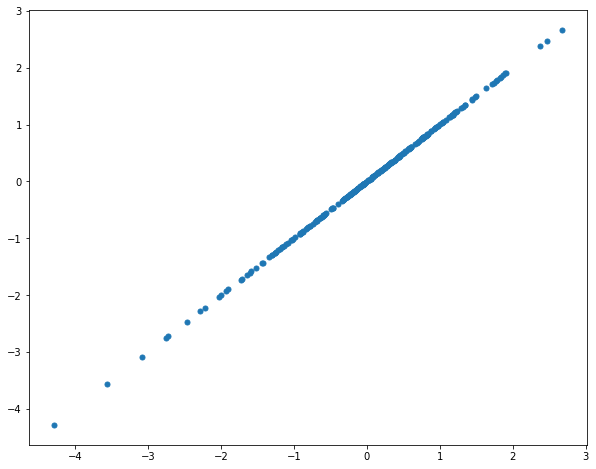

In [47]:
weights = np.linalg.lstsq(snpdata_i.val, phenodata_i.val)[0] #usually would add a 1's column
predicted = snpdata_i.val.dot(weights)

import matplotlib.pyplot as plt
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
plt.plot(phenodata_i.val, predicted, '.', markersize=10)
plt.show() #Easy to 'predict' seen 250 cases with 5000 variables.

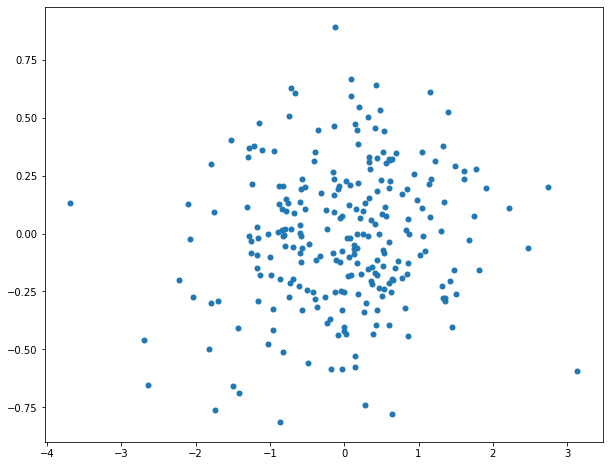

In [49]:
# How does it predict unseen cases?
phenoreader_unseen = Pheno(pheno_fn)[-2::-2,:]
snpreader_u,phenoreader_u  = pstutil.intersect_apply([snpreader,phenoreader_unseen])

snpdata_u = snpreader_u.read()
phenodata_u = phenoreader_u.read()

predicted_u = snpdata_u.val.dot(weights)

plt.plot(phenodata_u.val, predicted_u, '.', markersize=10)
plt.show() #Hard to predict unseen 250 cases with 5000 variables.

*<font color='red'>see PowerPoint summary</font>*

# Standardization, Kernels

###  To Unit standardize: read data, ".standardize()"

In [50]:
snpreader = Bed(all_bed_file,count_A1=False)
snpdata = snpreader.read()
snpdata = snpdata.standardize() #In place AND returns self
print(snpdata.val[:,:5])

[[ 0.30156099  0.2481353  -0.50673344 -1.68318496  0.84178108]
 [ 0.30156099  0.2481353  -0.50673344 -0.29670641  0.84178108]
 [ 0.30156099  0.2481353  -0.50673344 -1.68318496 -0.77702869]
 ...
 [ 0.30156099  0.2481353   1.01043255  1.08977214  0.84178108]
 [ 0.30156099  0.2481353   1.01043255 -0.29670641  0.84178108]
 [ 0.30156099  0.2481353   1.01043255  1.08977214 -0.77702869]]


### Sets means per sid to 0 and stdev to 1 and fills nan with 0.
In one line:

In [51]:
snpdata = Bed(all_bed_file,count_A1=False).read().standardize()
print(snpdata.val[:,:5])

[[ 0.30156099  0.2481353  -0.50673344 -1.68318496  0.84178108]
 [ 0.30156099  0.2481353  -0.50673344 -0.29670641  0.84178108]
 [ 0.30156099  0.2481353  -0.50673344 -1.68318496 -0.77702869]
 ...
 [ 0.30156099  0.2481353   1.01043255  1.08977214  0.84178108]
 [ 0.30156099  0.2481353   1.01043255 -0.29670641  0.84178108]
 [ 0.30156099  0.2481353   1.01043255  1.08977214 -0.77702869]]


### Beta standardization

In [52]:
from pysnptools.standardizer import Beta
snpdataB = Bed(all_bed_file,count_A1=False).read().standardize(Beta(1,25))
print(snpdataB.val[:,:4])

[[ 7.40112054e-01  7.15532756e-01 -5.02003205e-04 -1.89970988e-04]
 [ 7.40112054e-01  7.15532756e-01 -5.02003205e-04 -3.34874723e-05]
 [ 7.40112054e-01  7.15532756e-01 -5.02003205e-04 -1.89970988e-04]
 ...
 [ 7.40112054e-01  7.15532756e-01  1.00100040e-03  1.22996043e-04]
 [ 7.40112054e-01  7.15532756e-01  1.00100040e-03 -3.34874723e-05]
 [ 7.40112054e-01  7.15532756e-01  1.00100040e-03  1.22996043e-04]]


### To create an kernel (the relateness of each iid pair as the dot product of their standardized SNP values)

In [53]:
from pysnptools.standardizer import Unit
kerneldata = Bed(all_bed_file,count_A1=False).read_kernel(standardizer=Unit())
print(kerneldata.val[:,:4])

[[5081.6121922   253.32922313  165.9842232   360.75883739]
 [ 253.32922313 5061.87849635  384.04149913  466.05844787]
 [ 165.9842232   384.04149913 4922.10583668  171.75732175]
 ...
 [-130.76998392 -334.33599388 -257.64796899 -255.81034978]
 [-298.66392286 -127.02308706 -305.3966     -141.91272418]
 [-287.66887036 -291.41483161 -289.73600005 -364.74382324]]


In [54]:
kerneldata = Bed(all_bed_file,count_A1=False).read_kernel(standardizer=Unit(),block_size=500)
print(kerneldata.val[:,:4])

[[5081.6121922   253.32922313  165.9842232   360.75883739]
 [ 253.32922313 5061.87849635  384.04149913  466.05844787]
 [ 165.9842232   384.04149913 4922.10583668  171.75732175]
 ...
 [-130.76998392 -334.33599388 -257.64796899 -255.81034978]
 [-298.66392286 -127.02308706 -305.3966     -141.91272418]
 [-287.66887036 -291.41483161 -289.73600005 -364.74382324]]


*<font color='red'>see PowerPoint summary</font>*

## PstReader
### Every SnpReader is a PstReader

In [55]:
from pysnptools.snpreader import Bed
pstreader = Bed(all_bed_file,count_A1=False)
print(pstreader.row_count, pstreader.col_count)

500 5000


In [56]:
print(pstreader.col_property)

[[   1    0    0]
 [   1    1    1]
 [   1    2    2]
 ...
 [   5 4997 4997]
 [   5 4998 4998]
 [   5 4999 4999]]


### Can also create PstData from scratch, on the fly

In [57]:
from pysnptools.pstreader import PstData
data1 = PstData(row=['a','b','c'],
                col=['y','z'],
                val=[[1,2],[3,4],[np.nan,6]],
                row_property=['A','B','C'])
reader2 = data1[data1.row < 'c', data1.col_to_index(['z','y'])]
print(reader2)

PstData()[[0,1],[1,0]]


In [58]:
print(reader2.read().val)

[[2. 1.]
 [4. 3.]]


In [59]:
print(reader2.row_property)

['A' 'B']


In [60]:
print(reader2.col_property.shape, reader2.col_property.dtype)

(2, 0) <U1


### Two new PstReaders: PstNpz and PstHdf5

In [61]:
from pysnptools.pstreader import PstNpz, PstHdf5
fnnpz = "delme.pst.npz"
PstNpz.write(fnnpz,data1)
data2 = PstNpz(fnnpz).read()

fnhdf5 = "delme.pst.hdf5"
PstHdf5.write(fnhdf5,data2)
data3 = PstHdf5(fnhdf5).read()

print(data2, data3)

PstData(PstNpz('delme.pst.npz')) PstData(PstHdf5('delme.pst.hdf5'))


In [62]:
print(data2.val)
print(data3.val)

[[ 1.  2.]
 [ 3.  4.]
 [nan  6.]]
[[ 1.  2.]
 [ 3.  4.]
 [nan  6.]]


*<font color='red'>see PowerPoint summary</font>*

## IntRangeSet
### Union of two sets
<img src="example1.png">

In [63]:
from pysnptools.util import IntRangeSet
a = IntRangeSet("100:500,501:1000") # a is the set of integers from 100 to 500 (exclusive) and 501 to 1000 (exclusive)
b = IntRangeSet("-20,400:600")      # b is the set of integers -20 and the range 400 to 600 (exclusive)
c = a | b                           # c is the union of a and b, namely -20 and 100 to 1000 (exclusive)
print(c)
print(200 in c)
print(-19 in c)

IntRangeSet('-20,100:1000')
True
False


### Set difference
Suppose we want to find the intron regions of a gene but we are given only the transcription region and the exon regions.
<img src="example2.png">

In [64]:
from pysnptools.util import IntRangeSet
line = "chr15   29370   37380   29370,32358,36715   30817,32561,37380"
chr,trans_start,trans_last,exon_starts,exon_lasts = line.split() # split the line on white space
trans_start = int(trans_start)
trans_stop = int(trans_last) + 1 # add one to convert the inclusive "last" value into a Pythonesque exclusive "stop" value
int_range_set = IntRangeSet((trans_start,trans_stop)) # creates a IntRangeSet from 29370 (inclusive) to 37381 (exclusive)
print(int_range_set) # print at any time to see the current value

IntRangeSet('29370:37381')


Parse the exon start and last lists from strings to lists of integers (converting ‘last’ to ‘stop’)

In [65]:
exon_starts = [int(start) for start in exon_starts.strip(",").split(',')]
exon_stops = [int(last)+1 for last in exon_lasts.strip(",").split(',')]
assert len(exon_starts) == len(exon_stops)

Zip together the two lists to create an iterable of exon_start,exon_stop tuples. Then ‘set subtract’ all these ranges from int_range_set.

In [66]:
int_range_set -= zip(exon_starts,exon_stops)
print(int_range_set) # See what it looks like

IntRangeSet('30818:32358,32562:36715')


Create the desired output by iterating through each contiguous range of integers.

In [67]:
for start, stop in int_range_set.ranges():
    print("{0}   {1}     {2}".format(chr, start, stop-1))

chr15   30818     32357
chr15   32562     36714


*<font color='red'>see PowerPoint summary</font>*

## FastLMM

In [68]:
# import the algorithm
from fastlmm.association import single_snp_leave_out_one_chrom
from pysnptools.snpreader import Bed

# set up data
##############################
all_bed_file = example_file("doc/ipynb/all.*",endswith="*.bed")
snps = Bed(all_bed_file,count_A1=False)
pheno_fn = example_file("doc/ipynb/pheno_10_causals.txt")
cov_fn = example_file("doc/ipynb/cov.txt")

# run gwas
###################################################################
results_df = single_snp_leave_out_one_chrom(snps,  pheno_fn, covar=cov_fn)

# print head of results data frame
import pandas as pd
pd.set_option('display.width', 1000)
results_df.head(n=10)

,sid_index,SNP,Chr,GenDist,ChrPos,PValue,SnpWeight,SnpWeightSE,SnpFractVarExpl,Mixing,Nullh2
0,52,snp495_m0_.01m1_.04,5,4052,4052,2.990684e-23,0.418653,0.040052,0.424521,0.0,0.451117
1,392,snp1422_m0_.49m1_.5,3,2392,2392,8.251922e-23,-0.416495,0.040300,0.420587,0.0,0.279710
2,650,snp1200_m0_.37m1_.36,3,2650,2650,3.048007e-14,0.328870,0.042021,0.331240,0.0,0.279710
3,3,snp433_m0_.14m1_.11,3,2003,2003,9.202499e-10,-0.268289,0.042973,0.269670,0.0,0.279710
4,274,snp2832_m0_.46m1_.1,4,3274,3274,7.069762e-04,0.170421,0.050003,0.151124,0.0,0.542046
5,13,snp1413_m0_.04m1_.03,3,2013,2013,8.161238e-04,-0.148719,0.044157,0.149377,0.0,0.279710
6,214,snp2804_m0_.16m1_.3,3,2214,2214,1.239806e-03,0.150705,0.046396,0.144180,0.0,0.279710
7,117,snp751_m0_.04m1_.25,1,117,117,1.527432e-03,-0.152430,0.047827,0.141523,0.0,0.614963
8,265,snp1440_m0_.35m1_.32,4,3265,3265,1.771049e-03,0.136281,0.043358,0.139610,0.0,0.542046
9,307,snp2162_m0_.61m1_.42,2,1307,1307,1.816576e-03,-0.143296,0.045700,0.139280,0.0,0.534262


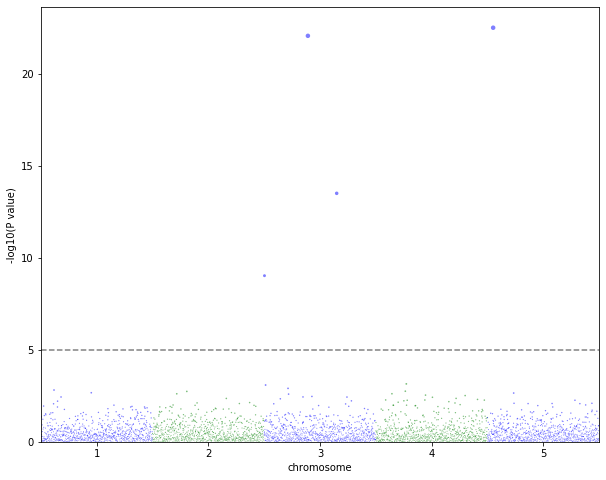

In [69]:
# manhattan plot
import pylab
import fastlmm.util.util as flutil
flutil.manhattan_plot(results_df[["Chr", "ChrPos", "PValue"]],pvalue_line=1e-5,xaxis_unit_bp=False)
pylab.show()

*<font color='red'>see PowerPoint summary</font>*